## Exploring Categorical Variables

A 2014 poll in the US asked respondents how difficult they think it is to save money. We can present the results of the survey in a frequency table of the 500 participants. 231 said it's very difficult to save money. 196 said it's somewhat difficult, 58 said it's not very difficult, 14 said it's not at all difficult, and one respondent was not sure.  

| ID |        Answer        | Counts | Frequencies |
| :-:| :------------------- | -----: | ----------: |
|  A | Very difficult       |    231 |         46% | 
|  B | Somewhat difficult   |    196 |         39% |
|  C | Not very difficult   |     58 |         12% |
|  D | Not at all difficult |     14 |          3% |
|  E | Not sure             |      1 |         ~0% |
|    | Total                |    500 |        100% |

A graphical way of representing these data is a bar plot.

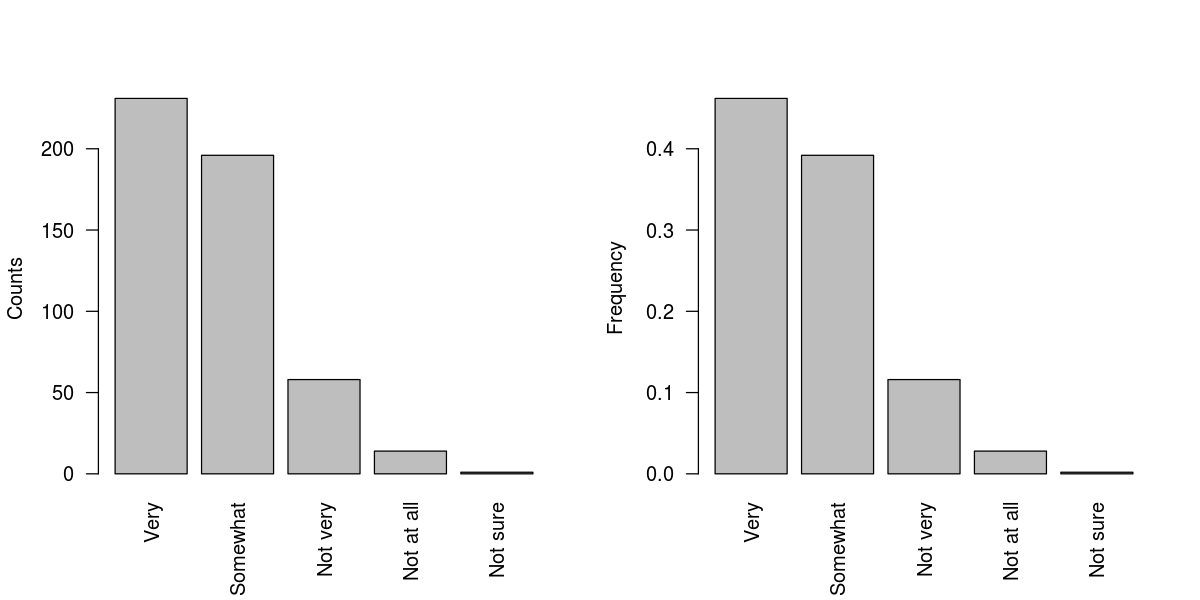

In [37]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1,2))
answers <- c(231, 196, 58, 14, 1)
frequencies <- answers/sum(answers)
lbls <- c("Very", "Somewhat", "Not very", "Not at all", "Not sure")
barplot(answers, ylab="Counts", names.arg=lbls, las=2)
barplot(frequencies, ylab="Frequency", names.arg=lbls, las=2)

**Bar plots vs. Histograms**

Bar plots are used for displaying distributions of categorical variables, while histograms are used for numerical variables. Also, the axis in a histogram is a number line, where the orders of the bars cannot be changed. While in a bar plot, the categories can be listed in any order, though some orderings make more sense than others, especially for original variables. 

**Pie chart**

Pie chart can also be used to represent categorical variables. However, a pie chart is actually much less informative then a bar plot. First, while it tells us the relative ordering of the levels, it doesn't actually tell us what percentage of the distribution falls into which level. Second, when there are many levels in a categorical variable with similar relative frequencies, it might be difficult to determine which level is more highly represented just by looking at a pie chart.

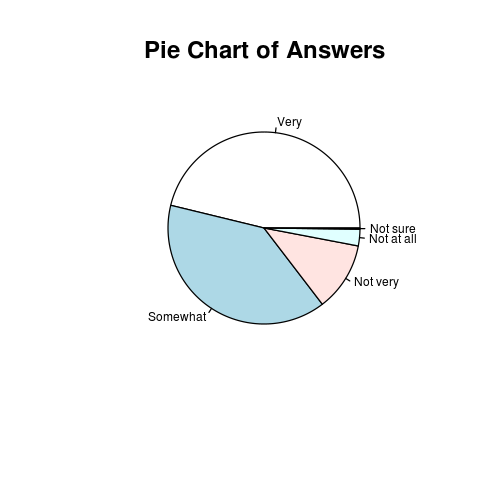

In [41]:
options(repr.plot.width=4, repr.plot.height=4)
pie(frequencies, labels=lbls, main="Pie Chart of Answers", cex=0.6)

Similarly to the data showed earlier, we asked how much income each participant makes. And we might wonder if whether people think it's difficult or easy to save money is related to their income. To evaluate this, we organize these variables in a contingency table. There are three levels of the income we consider. Less than 40,000 per year, between 40 and 80,000 per year, and more than 80,000 per year. There are also some respondents who refuse to answer this question. To evaluate whether income and perception of difficulty of saving are related, we will need to compare people who think, say, it's very difficult to save money among the different income levels.  

|            | <\$40K |\$40-80K | >\$80K | Refused | Total |
| :--------- | :----: | :-----: | :----: | :-----: | :---: |
| Very       |    128 |      63 |     31 |       9 |   231 |
| Somewhat   |     54 |      71 |     61 |      10 |   196 |
| Not very   |     17 |       7 |     27 |       7 |    58 |
| Not at all |      3 |       6 |      5 |       0 |    14 |
| Not sure   |      0 |       1 |      0 |       0 |     1 | 
| Total      |    202 |     148 |    124 |      26 |   500 |



We can't just compare these counts since the sample sizes for each income level are different. Instead, we should consider the distribution of one variable conditional on the other. To find out what percent of people who make less than 40,000 per year think it's very difficult to save money, we just consider the first column. Among the 202 people who make less than 40,000 per year, 128 think it's very difficult to save money, which makes up 63%.

$
<\$40K :: (Very) :: \frac{128}{202} = 0.6336 \ \ \rightarrow \ \ \approx63\%
$

Similarly, 63 out of 148, those who make between 40 and 80,000, or in other words 43\%, think it's very difficult to save money.

$
<\$40-80K :: (Very) :: \frac{63}{148} = 0,4256 \ \ \rightarrow \ \ \approx43\%
$

**Segmented Plot**

In order to visualize two or more categorical variables, there is the segmented bar plot. Segmented bar plots are useful for visualizing conditional frequency distributions. In other words, the distribution of the levels of one variable, the response variable, conditioned on the levels of the other, the explanatory variable. The heights of the bars indicate the numbers of respondents in various income categories. And the bars are segmented by color to indicate the numbers of those who think it's very difficult to save money to not at all. Note that this are frequencies, in other words, counts, and not relative frequencies. So, while segmented bar plots are useful for visualizing frequency distributions, in order to explore the relationship between these variables, we need a visualization of the relative frequencies.

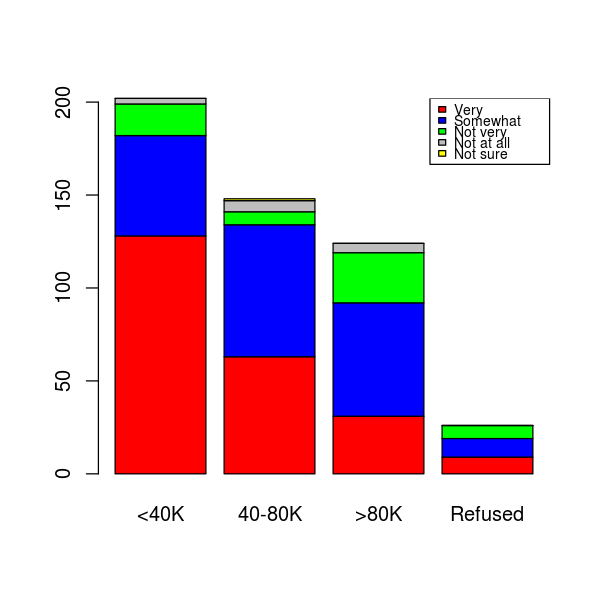

In [23]:
counts <- read.table(text = "
l40K   b40e80K   g80K   Refused
1 128 63 31  9
2  54 71 61 10
3  17  7 27  7
4   3  6  5  0
5   0  1  0  0", header = TRUE)
colnames(counts) <- c("<40K", "40-80K", ">80K", "Refused")
rownames(counts) <- c("Very", "Somewhat", "Not very", "Not at all", "Not sure")

options(repr.plot.width=5, repr.plot.height=5)
col <- c("red","blue", "green", "gray", "yellow")
barplot(as.matrix(counts), col=col)
legend("topright", c("Very", "Somewhat", "Not very", "Not at all", "Not sure"), 
       fill=col, horiz=FALSE, cex=0.7, text.width=1)

We can see the same bar plot in terms of probability:

,<40K,40-80K,>80K,Refused
Very,0.63366337,0.425675676,0.25000000,0.3461538
Somewhat,0.26732673,0.479729730,0.49193548,0.3846154
Not very,0.08415842,0.047297297,0.21774194,0.2692308
Not at all,0.01485149,0.040540541,0.04032258,0.0000000
Not sure,0.00000000,0.006756757,0.00000000,0.0000000


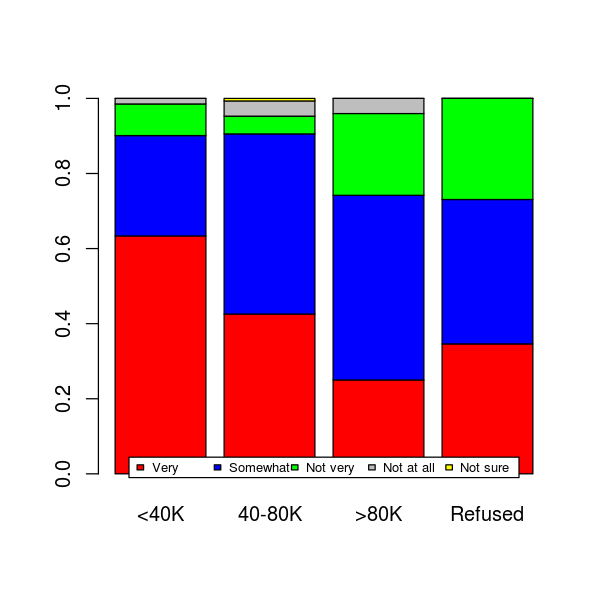

In [32]:
# Create a matrix with the percentage of each count related to the sum of the column
sums <- colSums(counts)
freq <- sweep(counts, 2, sums, '/')
freq 

barplot(as.matrix(freq), col=col)
legend("bottom", c("Very", "Somewhat", "Not very", "Not at all", "Not sure"), 
        fill=col, horiz=TRUE, cex=0.65, text.width=0.6)

**Mosaic Plot**

A mosaic plot displays the distribution of feelings about difficulty of saving money, conditional on income as well. It also shows the marginal distribution of income, too. So, let's start with the marginal distribution. The width of the bars is what's telling us about the marginal distribution of income. 

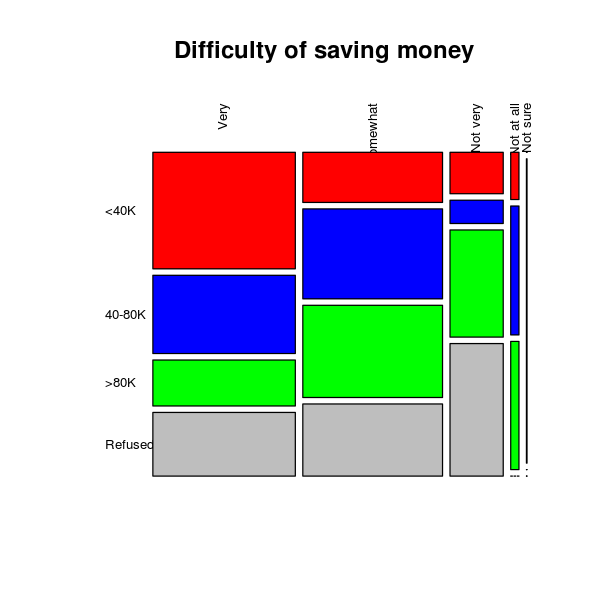

In [35]:
mosaicplot(as.matrix(freq), col=col, main="Difficulty of saving money", las=2)

We can see that more people make less than 40,000 have been surveyed than any other. Now, let's look at the breakdown of the individual bars. Among those who make less than 40,000, we had seen that 63% think it's very difficult to save money. These respondents are represented by the segment in the first bar. Similarly, 43% of those who make between 40 and 80,000, and 25% of those who make more than 80,000, and 35% of those who refused to share their income, are represented in the first segment within their respective bars. Visually, without relying on the relative percentages we calculated earlier, we can see that the length of the segments representing those who think it's very difficult to save money vary by income level. Indicating a difference of opinion among members of different income groups, hence suggesting a relationship between the two variables. We could, of course, examine the other levels of the opinion variable as well. 

### Questions

1) A 2012 survey asked 477 San Francisco residents if they feel that the laws covering the sale of firearms should be made more strict, less strict, or kept as they are now. The survey also asked about respondents' party affiliation. The survey results are summarized in the contingency table below. Based on the survey results, which of the following is false?

|                  | republican | democrat | independent | total |
| :--------------- | :--------: | :------: | :---------: | :---: |
| more strict      |         54 |      235 |          63 |   352 |
| less strict      |          9 |       11 |           9 |    29 |
| kept as they are |          9 |       26 |          61 |    96 |
| total            |         72 |      272 |         133 |   477 |

&#9744; Approximately 75% of Republicans in this sample want stricter gun laws.  
&#9744; Approximately 86% of Democrats in this sample want stricter gun laws.  
&#9745; Approximately 18% of Independents in this sample want stricter gun laws.  
&#9744; Approximately 27% of those who think gun laws should be kept as they are are Democrats.  
&#9744; Opinion on gun laws and party affiliation appear to be dependent.  

**Solving**:

More strict :: Republican $\frac{54}{72} = 0.75 \ \ \rightarrow \ \ 75\%$  
More strict :: Democrat $\frac{235}{272} = 0.864 \ \ \rightarrow \ \ \approx86\%$  
More strict :: Independent $\frac{63}{133} = 0.473 \ \ \rightarrow \ \ \approx47\%$  
Kept as they are :: Democrats $\frac{26}{96} = 0.27 \ \ \rightarrow \ \ 27\%$  

<br>

2) The histogram and box plots below show the distribution of finishing times for male and female winners of the New York Marathon between 1980 and 1999. Which of the following is false?

<img src="images/box_plot_ex.jpg" width="500" align="center"/>

&#9745; On average females run faster than males as indicated by the higher median.  
&#9744; Female winning times are more variable than male finishing times.  
&#9744; Neither gender has runners that are unusually fast compared to the other winners.  
&#9744; Male distribution is more symmetric compared to the female distribution.  
&#9744; Gender and winning times appear to be dependent.  

### Introduction to Inference

In 1972, as part of a study on gender discrimination, 48 male bank supervisors were each given the same personnel file, and asked to judge whether the person should be promoted to a branch manager job that was described as routine. The files were identical except that half of the supervisors had files showing the person was male while the other half had files showing the person was female. It was randomly determined which supervisors got male applications and which got female applications. Of the 48 files reviewed 35 were promoted. The study is testing whether females are unfairly discriminated against.

|        | promoted | not promoted | total |
| :----- | :------: | :----------: | :---: |
| male   |       21 |            3 |    24 |
| female |       14 |           10 |    24 |
| Total  |       35 |           13 |    48 |

% of males promoted = $\frac{21}{24} \approx88\%$  
% of females promoted = $\frac{14}{24} \approx58\%$

There are two possible explanations as to what might be going on in this study. 
- **Null hypothesis (H0)**: there is nothing going on since promotion and gender are independent. There's no gender discrimination, and the observed difference in proportions is simply due to chance.
- **Alternative hypothesis (H1)**: there is something going on since promotion and gender are dependent on each other. There is gender discrimination, that observed difference in proportions is not due to chance.

In order to check the hypothesis, we collect data and then, we judge this evidence and ask ourselves the question, could these data plausibly have happened by chance if the null hypothesis were true?
- **Yes**: We fail to reject the null hypothesis (H0) and state that the evidence is not sufficient to suggest that the the variables are dependent. It does not mean that there is not discrimination, just that there is not enough evidence to infer that it exists. We never declare the null hypothesis to be true because we do not know and cannot prove whether it's true or not.
- **No**: Reject the null hypothesis (H0). If the data were very unlikely to have occurred, then the evidence raises more than a reasonable doubt in our minds about the null hypothesis, and hence we reject the null hypothesis in favor of the alternative hypothesis

In a hypothesis test, the burden of proof is on the unusual claim. Thus, the null hypothesis is the ordinary state of affairs, the status quo. So it's the alternative hypothesis that we must consider unusual, and for which we must gather evidence. 

**Simulation Scheme** using a deck of playing cards to simulate the experiment

The objective is to conduct a simulation under the assumption that the null hypothesis is true. In other words, assuming there is no gender discrimination. And that differences in promotion rates that are observed, are simply due to chance.

1) *Face card*: not promoted, *non-face card*: promoted  
&#9656; set aside the jokers, consider aces as face cards. *There are 52 cards in a deck, however, only 48 files in our experiment. To simulate the experiment, we need to remove some cards to hit a total sample size of 48.*  
&#9656; take out 3 aces $\rightarrow$ 13 face cards left in the deck (face cards: A, K, Q, J). *We take cards out in such a way that if we let a face card represent not promoted and a non-face card represent a promoted file. The distribution of face and non face cards match the distribution of the promoted and not promoted files. So, we're also going to take out three aces.*  
&#9656; take out a number card $\rightarrow$ 35 number (non-face) cards left in the deck (number cards: 2-10)

The deck finally is composed by 35 non-face cards (marked in pink) and 13 face cards (marked in blue) as illustred in the image below: 

<img src="images/cards_deck.png" width="700" align="center"/>

2) shuffle the cards, deal into two groups of size 24, representing males and females as illustred in the image below:

| 24 cards shuffled (Male)   |  24 cards shuffled (Female)  |
| :-------------------------:|:---------------------------: |
| ![](images/shuffled_1.png) |  ![](images/shuffled_2.png)  |

3) Count how many number cards are in each group (representing promoted files)  
Male (left figure above): 17 promoted  
Female (right figure above): 18 promoted  

4) Calculate the proportion of promoted files in each group, take the difference (male-female), and record this value  
Prop_male = $\frac{17}{24}$ = 0.7083  
Prop_female = $\frac{18}{24}$ = 0.75  
Difference = Prop_female - Prop_male = 0.75 - 0.7083 = 0.0417  

5) Repeat the steps 2 to 4 many times

**Making the decision**

If the results from the simulations **look like the data**, then we decide that the difference between the proportions of promoted files, between males and females, **was due to chance**, and that **promotion and gender are independent**. 

If, on the other hand, the results from the simulations **do not look like the data**, then we decide that the observed difference in the promotion rates **was unlikely to have happened just by chance**, and that it can be attributed to an actual effect of gender. In other words, we conclude that **these data provide evidence of a dependency between promotion decisions, and gender**. 

Assuming that the null hypothesis were true, we evaluated the probability of observing an outcome at least as extreme as the one observed in the original data. And since this **probability was low**, we decided to **reject the null hypothesis** in favor of the alternative. The probability of observing data, at least as extreme as the one observed in the original study, under the assumption that the null hypothesis is true, is called the _**p-value**_. One of the commonly used criteria for making decisions between competing hypotheses.

### Questions

1) *In 1972, as part of a study on gender discrimination, 48 male bank supervisors were each given the same personnel file, and asked to judge whether the person should be promoted to a branch manager job that was described as routine. The files were identical except that half of the supervisors had files showing the person was male while the other half had files showing the person was female. It was randomly determined which supervisors got male applications and which got female applications. Of the 48 files reviewed 35 were promoted. The study is testing whether females are unfairly discriminated against.*  

Is the study we just described an observational study or an experiment?  
&#9744; observational study  
&#9745; experiment  

<br>

2) We saw a difference of roughly 30% between the proportion of male and female files that are promoted. Based on this information, which of the below might be true? Select all that apply.  
&#9744; If we were to repeat the experiment we will definitely see that more female files get promoted. This was a fluke.  
&#9745; Males are more likely to be promoted, and hence there is gender discrimination against women in promotion decisions.  
&#9745; The difference in the proportions of promoted male and female files is due to chance, this is not evidence of gender discrimination.  
&#9744; Women are less qualified than men, and this is why fewer females get promoted.  

<br>

3) Given that we randomly shuffled the cards into the two piles to simulate randomly assigning male and female labels to the files, what would you expect to be the difference between the simulated proportions of promoted male and female files?  
&#9745; 0  
&#9744; 0.30  